In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PetThermoTools as ptt
import pickle

# %matplotlib widget

# this allows figures to be saved as svg files with the text preserved
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
# alphaMELTS for Python files need to be downloaded. Can be done here: https://magmasource.caltech.edu/gitlist/MELTS_Matlab.git/
import sys
sys.path.append(r'/Users/gleesonm/Library/CloudStorage/GoogleDrive-gleesonm@berkeley.edu/My Drive/2022/GitHub/MELTS130beta/MacOS')

In [4]:
# Can be used to suppress outputs on MacOS - run twice
import os
sys.stdout = open(os.devnull, 'w')
sys.stderr = open(os.devnull, 'w')

In [5]:
import julia
julia.install()
from julia.api import Julia
jl = Julia(compiled_modules=False)

In [7]:
with open('GalapWholeRock.pkl', 'rb') as f:
    WholeRock = pickle.load(f)

WholeRock['MnO'] = np.zeros(len(WholeRock['SiO2']))
WholeRock = WholeRock.rename(columns = {'FeO': 'FeOt'})
# WholeRock['Cr2O3'] = np.zeros(len(WholeRock['SiO2']))
# WholeRock['K2O'] = np.zeros(len(WholeRock['SiO2']))

# Sample 04b

In [8]:
Holland_04b = ptt.phaseDiagram_calc(Model = "Holland",
                                bulk = WholeRock.loc["04b"].to_dict(),
                                cores = 1,
                                T_max_C=1400,
                                T_min_C=900,
                                T_num=100,
                                P_min_bar=1000,
                                P_max_bar=12000,
                                P_num=100,
                                Fe3Fet_Liq=0.12,
                                i_max = 300)

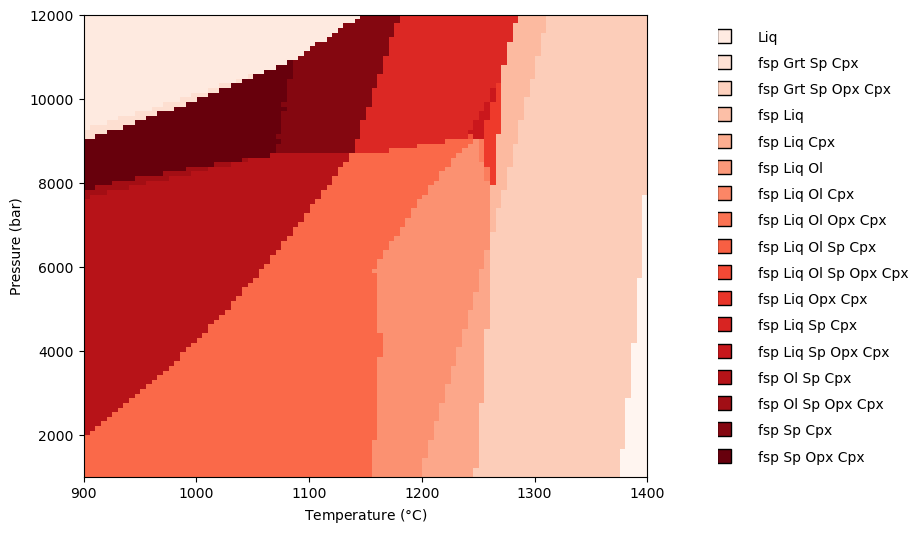

In [9]:
ptt.plot_phaseDiagram(Combined = Holland_04b)

In [10]:
pMELTS_04b = ptt.phaseDiagram_calc(Model = "pMELTS",
                                bulk = WholeRock.loc["04b"].to_dict(),
                                cores = 1,
                                T_max_C=1400,
                                T_min_C=950,
                                T_num=45,
                                P_min_bar=1000,
                                P_max_bar=12000,
                                P_num=45,
                                Fe3Fet_Liq = 0.12,
                                i_max = 100)

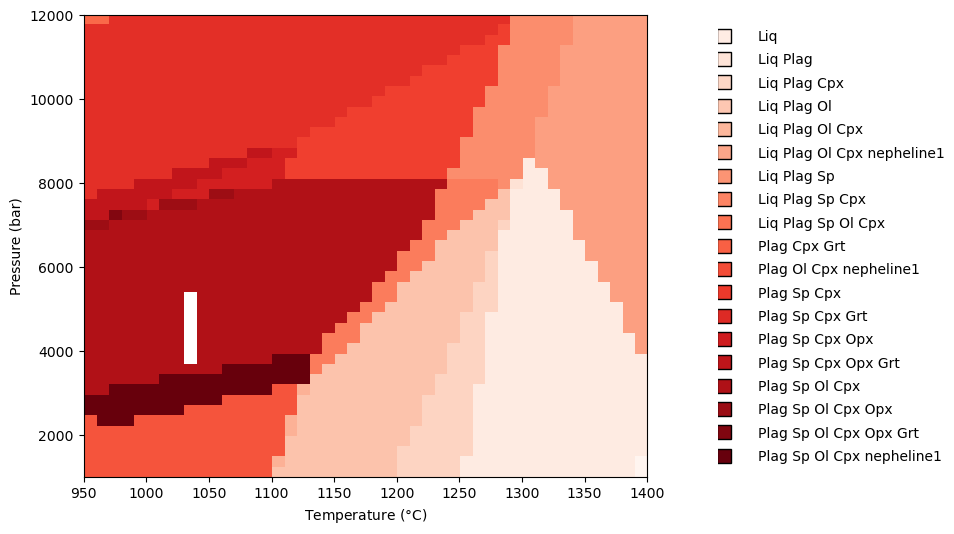

In [11]:
ptt.plot_phaseDiagram(Model = "pMELTS", Combined = pMELTS_04b)

In [12]:
for i in range(1):
    pMELTS_04b = ptt.phaseDiagram_refine(Data = pMELTS_04b, Model = "pMELTS", bulk = WholeRock.loc['04b'].to_dict(), i_max = 300, Fe3Fet_Liq = 0.12)

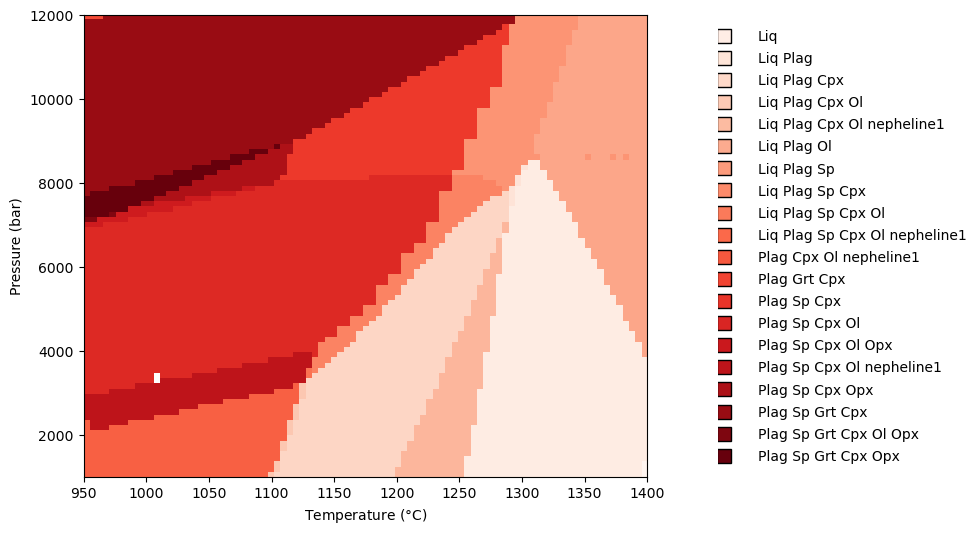

In [13]:
ptt.plot_phaseDiagram(Model = "pMELTS", Combined = pMELTS_04b)

In [14]:
rMELTS_04b = ptt.phaseDiagram_calc(Model = "MELTSv1.0.2",
                                bulk = WholeRock.loc["04b"].to_dict(),
                                cores = 1,
                                T_max_C=1400,
                                T_min_C=1000,
                                T_num=45,
                                P_min_bar=2000,
                                P_max_bar=8000,
                                P_num=45,
                                Fe3Fet_Liq=0.12,
                                i_max = 50)

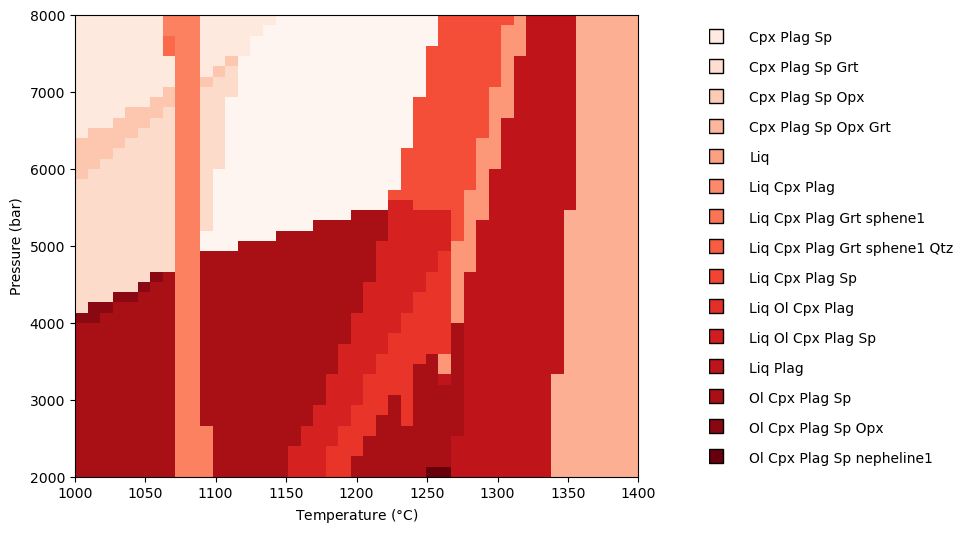

In [15]:
ptt.plot_phaseDiagram(Model = "pMELTS", Combined = rMELTS_04b)

# Sample 03b

In [16]:
Holland_03b = ptt.phaseDiagram_calc(Model = "Holland",
                                bulk = WholeRock.loc["03b"].to_dict(),
                                cores = 1,
                                T_max_C=1400,
                                T_min_C=950,
                                T_num=100,
                                P_min_bar=1000,
                                P_max_bar=12000,
                                P_num=100,
                                Fe3Fet_Liq=0.12,
                                i_max = 300)

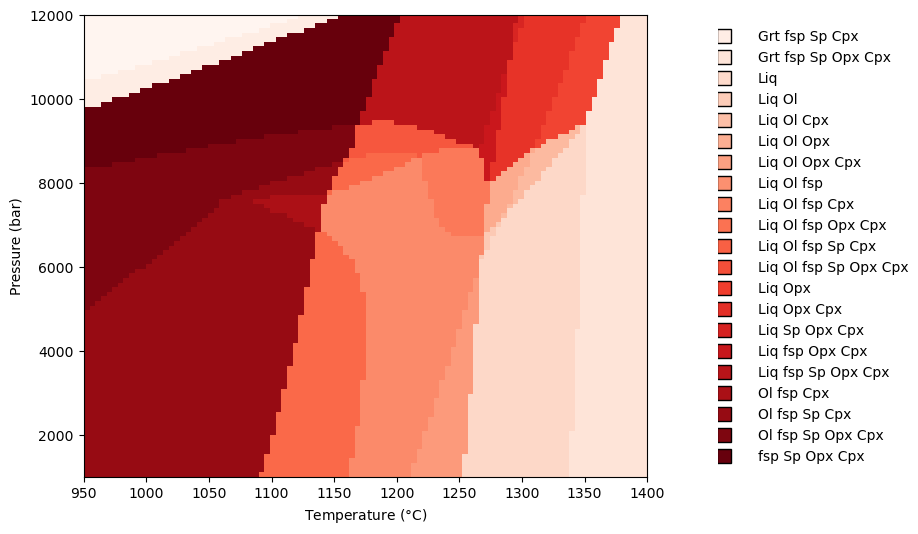

In [17]:
ptt.plot_phaseDiagram(Combined = Holland_03b)

In [18]:
pMELTS_03b = ptt.phaseDiagram_calc(Model = "pMELTS",
                                bulk = WholeRock.loc["03b"].to_dict(),
                                cores = 1,
                                T_max_C=1400,
                                T_min_C=950,
                                T_num=64,
                                P_min_bar=1000,
                                P_max_bar=12000,
                                P_num=64,
                                Fe3Fet_Liq = 0.12,
                                i_max = 100)

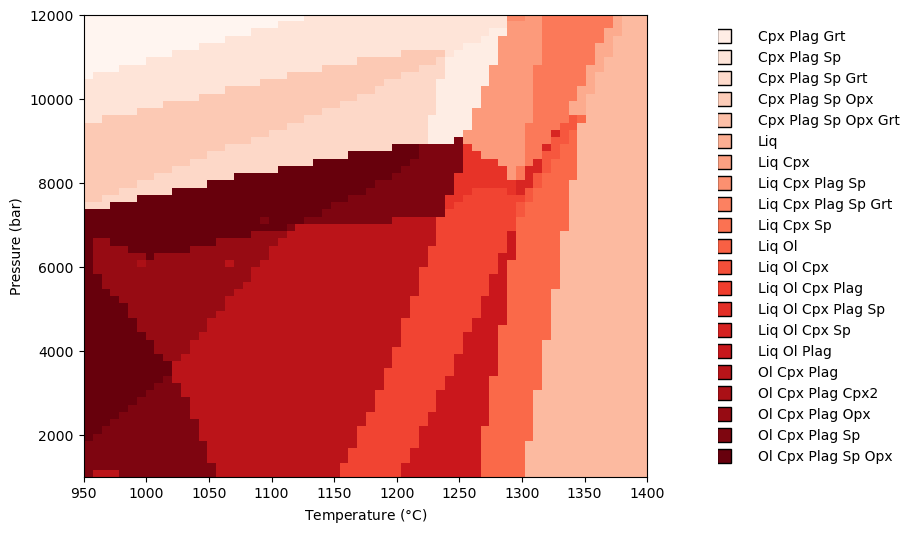

In [19]:
ptt.plot_phaseDiagram(Combined = pMELTS_03b)

In [20]:
for i in range(1):
    pMELTS_03b = ptt.phaseDiagram_refine(Data = pMELTS_03b, Model = "pMELTS", bulk = WholeRock.loc['03b'].to_dict(), i_max = 300, Fe3Fet_Liq = 0.12)

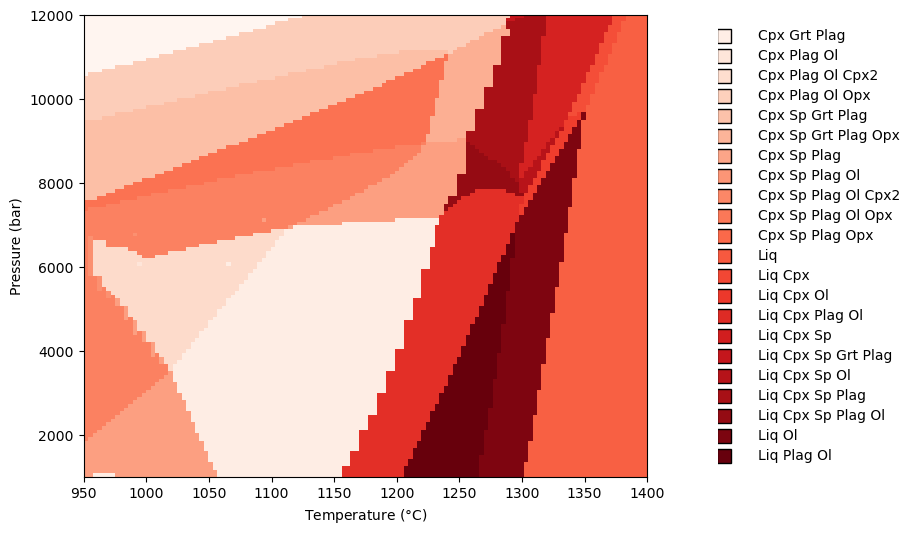

In [21]:
ptt.plot_phaseDiagram(Combined = pMELTS_03b)

# Create Main Text Figure 8

In [22]:
# extract information for plotting model paths
PD_03b = pMELTS_03b.copy()

T = np.linspace(1240,1025,101)
Model1 = pd.DataFrame(columns = list(PD_03b.columns)[:], data = np.zeros((len(T),len(list(PD_03b.columns)[:]))))
def find_closest_numbers(arr, target_value):
    # Sort the array
    sorted_arr = np.sort(arr)

    # Find the index where the target_value would be inserted
    index = np.searchsorted(sorted_arr, target_value)

    # Get the two closest values
    lower_value = sorted_arr[max(0, index - 1)]
    higher_value = sorted_arr[min(index, len(arr) - 1)]

    return lower_value, higher_value

for i in range(len(T)):
    lower, upper = find_closest_numbers(PD_03b['T_C'].values,T[i])

    lower_cont = 1 - (T[i] - lower)/(upper - lower)
    upper_cont = 1 - lower_cont


    lowerP, upperP = find_closest_numbers(PD_03b['P_bar'].values,8000.0)

    lower_contP = 1 - (8000.0 - lowerP)/(upperP - lowerP)
    upper_contP = 1 - lower_contP

    topright = upper_cont*upper_contP
    topleft = lower_cont*upper_contP
    bottomright = upper_cont*lower_contP
    bottomleft = lower_cont*lower_contP

    A = (PD_03b[(PD_03b['P_bar'] == lowerP) & (PD_03b['T_C'] == lower)][list(PD_03b.columns)[:]].reset_index(drop = True)*bottomleft + 
                PD_03b[(PD_03b['P_bar'] == upperP) & (PD_03b['T_C'] == upper)][list(PD_03b.columns)[:]].reset_index(drop = True)*topright+
                PD_03b[(PD_03b['P_bar'] == upperP) & (PD_03b['T_C'] == lower)][list(PD_03b.columns)[:]].reset_index(drop = True)*topleft+
                PD_03b[(PD_03b['P_bar'] == lowerP) & (PD_03b['T_C'] == upper)][list(PD_03b.columns)[:]].reset_index(drop = True)*bottomright)
    
    Model1.loc[i] = A.values

Xol = 0.1*3.5/(0.1*3.5+46.6*3.4+3.35*15.8+2.7*32.2+4.05*5.3)
Xopx = 15.8*3.35/(0.1*3.5+46.6*3.4+3.35*15.8+2.7*32.2+4.05*5.3)
Xcpx = 46.6*3.4/(0.1*3.5+46.6*3.4+3.35*15.8+2.7*32.2+4.05*5.3)
Xplg = 32.2*2.7/(0.1*3.5+46.6*3.4+3.35*15.8+2.7*32.2+4.05*5.3)
Xspl = 5.3*4.05/(0.1*3.5+46.6*3.4+3.35*15.8+2.7*32.2+4.05*5.3)


In [23]:
T_step1 = np.linspace(1220,1025,101)
P_step2 = np.linspace(6690,8000,50)
Model3_step1 = pd.DataFrame(columns = list(PD_03b.columns)[:], data = np.zeros((len(T_step1),len(list(PD_03b.columns)[:]))))
Model3_step2 = pd.DataFrame(columns = list(PD_03b.columns)[:], data = np.zeros((len(P_step2),len(list(PD_03b.columns)[:]))))

for i in range(len(T_step1)):
    lower, upper = find_closest_numbers(PD_03b['T_C'].values,T_step1[i])

    lower_cont = 1 - (T_step1[i] - lower)/(upper - lower)
    upper_cont = 1 - lower_cont

    lowerP, upperP = find_closest_numbers(PD_03b['P_bar'].values,P_step2[0])

    lower_contP = 1 - (P_step2[0] - lowerP)/(upperP - lowerP)
    upper_contP = 1 - lower_contP

    topright = upper_cont*upper_contP
    topleft = lower_cont*upper_contP
    bottomright = upper_cont*lower_contP
    bottomleft = lower_cont*lower_contP

    A = (PD_03b[(PD_03b['P_bar'] == lowerP) & (PD_03b['T_C'] == lower)][list(PD_03b.columns)[:]].reset_index(drop = True)*bottomleft + 
                PD_03b[(PD_03b['P_bar'] == upperP) & (PD_03b['T_C'] == upper)][list(PD_03b.columns)[:]].reset_index(drop = True)*topright+
                PD_03b[(PD_03b['P_bar'] == upperP) & (PD_03b['T_C'] == lower)][list(PD_03b.columns)[:]].reset_index(drop = True)*topleft+
                PD_03b[(PD_03b['P_bar'] == lowerP) & (PD_03b['T_C'] == upper)][list(PD_03b.columns)[:]].reset_index(drop = True)*bottomright)
    
    Model3_step1.loc[i] = A.values

for i in range(len(P_step2)):
    lower, upper = find_closest_numbers(PD_03b['T_C'].values,T_step1[-1])

    lower_cont = 1 - (T_step1[-1] - lower)/(upper - lower)
    upper_cont = 1 - lower_cont

    lowerP, upperP = find_closest_numbers(PD_03b['P_bar'].values,P_step2[i])

    lower_contP = 1 - (P_step2[i] - lowerP)/(upperP - lowerP)
    upper_contP = 1 - lower_contP

    topright = upper_cont*upper_contP
    topleft = lower_cont*upper_contP
    bottomright = upper_cont*lower_contP
    bottomleft = lower_cont*lower_contP

    A = (PD_03b[(PD_03b['P_bar'] == lowerP) & (PD_03b['T_C'] == lower)][list(PD_03b.columns)[:]].reset_index(drop = True)*bottomleft + 
                PD_03b[(PD_03b['P_bar'] == upperP) & (PD_03b['T_C'] == upper)][list(PD_03b.columns)[:]].reset_index(drop = True)*topright+
                PD_03b[(PD_03b['P_bar'] == upperP) & (PD_03b['T_C'] == lower)][list(PD_03b.columns)[:]].reset_index(drop = True)*topleft+
                PD_03b[(PD_03b['P_bar'] == lowerP) & (PD_03b['T_C'] == upper)][list(PD_03b.columns)[:]].reset_index(drop = True)*bottomright)
    
    Model3_step2.loc[i] = A.values

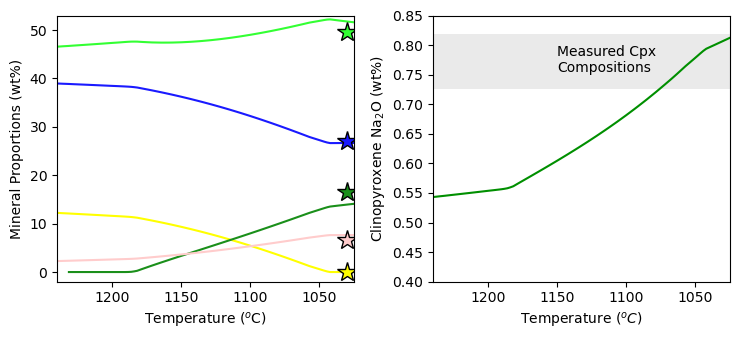

In [24]:
f, a = plt.subplots(1,2, figsize = (7.5,3.5),sharex=True)
plt.subplots_adjust(wspace=0.2,hspace=0)
a[0].set_ylabel('Mineral Proportions (wt%)')
a[1].set_ylabel('Clinopyroxene Na$_2$O (wt%)')
a[0].set_xlabel('Temperature ($^o$C)')
a[1].set_xlabel('Temperature ($^oC$)')

a[0].plot(Model1['T_C'], Model1['mass_Ol'], '-', color = (1,1,0), label = "Olivine")
a[0].plot(Model1['T_C'], Model1['mass_Cpx'], '-', color = (0.2,1,0.2), label = "Clinopyroxene")
a[0].plot(Model1['T_C'], Model1['mass_Opx'], '-', color = (0.1,0.56,0.1), label = "Orthopyroxene")
a[0].plot(Model1['T_C'], Model1['mass_Sp'], '-', color = (1,0.8,0.8), label = "Spinel")
a[0].plot(Model1['T_C'], Model1['mass_Plag'], '-', color = (0.1,0.1,1), label = "Plagioclase")
a[0].plot([1030],[100*Xcpx], '*k', mfc = (0.2,1,0.2), ms = 15)
a[0].plot([1030],[100*Xplg], '*k', mfc = (0.1,0.1,1), ms = 15)
a[0].plot([1030],[100*Xopx], '*k', mfc = (0.1,0.56,0.1), ms = 15)
a[0].plot([1030],[100*Xspl], '*k', mfc = (1,0.8,0.8), ms = 15)
a[0].plot([1030],[100*Xol], '*k', mfc = (1,1,0), ms = 15)
a[0].set_xlim([np.nanmax(Model1['T_C']), np.nanmin(Model1['T_C'])])
a[0].set_ylim([-2,53])

a[1].fill_between([1000, 1250], [0.726, 0.726], [0.819, 0.819], alpha = 0.1, facecolor = (0.2, 0.2, 0.2), zorder = 0)
a[1].plot(Model1['T_C'],Model1['Na2O_Cpx'], '-', color = (0, 0.56, 0), zorder = 1)
a[1].text(1150, 0.755, 'Measured Cpx \nCompositions')
a[1].set_ylim([0.4,0.85])

f.tight_layout()


(0.4, 0.85)

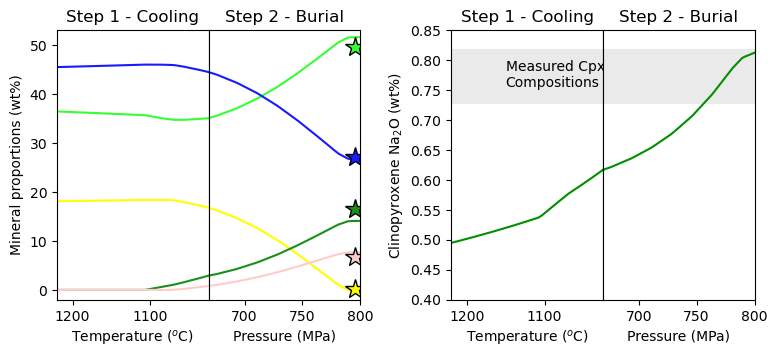

In [25]:
f, a = plt.subplots(1,5, figsize = (9,3.5), gridspec_kw={"width_ratios":[1,1,0.6,1,1]})
plt.subplots_adjust(wspace=0,hspace=0)
a[2].axis('off')
a[1].set_yticks([])
a[4].set_yticks([])

a[0].plot(Model3_step1['T_C'], Model3_step1['mass_Ol'], '-', color = (1,1,0), label = "Olivine")
a[0].plot(Model3_step1['T_C'], Model3_step1['mass_Cpx'], '-', color = (0.2,1,0.2), label = "Clinopyroxene")
a[0].plot(Model3_step1['T_C'], Model3_step1['mass_Opx'], '-', color = (0.1,0.56,0.1), label = "Orthopyroxene")
a[0].plot(Model3_step1['T_C'], Model3_step1['mass_Sp'], '-', color = (1,0.8,0.8), label = "Spinel")
a[0].plot(Model3_step1['T_C'], Model3_step1['mass_Plag'], '-', color = (0.1,0.1,1), label = "Plagioclase")
a[0].set_xlim([np.nanmax(Model3_step1['T_C']), np.nanmin(Model3_step1['T_C'])])
a[0].set_ylim([-2,53])
a[0].set_title('Step 1 - Cooling')
a[0].set_xlabel('Temperature ($^o$C)')
a[0].set_ylabel('Mineral proportions (wt%)')

a[1].plot(Model3_step2['P_bar']/10, Model3_step2['mass_Ol'], '-', color = (1,1,0), label = "Olivine")
a[1].plot(Model3_step2['P_bar']/10, Model3_step2['mass_Cpx'], '-', color = (0.2,1,0.2), label = "Clinopyroxene")
a[1].plot(Model3_step2['P_bar']/10, Model3_step2['mass_Opx'], '-', color = (0.1,0.56,0.1), label = "Orthopyroxene")
a[1].plot(Model3_step2['P_bar']/10, Model3_step2['mass_Sp'], '-', color = (1,0.8,0.8), label = "Spinel")
a[1].plot(Model3_step2['P_bar']/10, Model3_step2['mass_Plag'], '-', color = (0.1,0.1,1), label = "Plagioclase")
a[1].plot([795],[100*Xcpx], '*k', mfc = (0.2,1,0.2), ms = 15)
a[1].plot([795],[100*Xplg], '*k', mfc = (0.1,0.1,1), ms = 15)
a[1].plot([795],[100*Xopx], '*k', mfc = (0.1,0.56,0.1), ms = 15)
a[1].plot([795],[100*Xspl], '*k', mfc = (1,0.8,0.8), ms = 15)
a[1].plot([795],[100*Xol], '*k', mfc = (1,1,0), ms = 15)
a[1].set_xlim([np.nanmin(Model3_step2['P_bar'])/10, np.nanmax(Model3_step2['P_bar'])/10])
a[1].set_ylim([-2,53])
a[1].set_title('Step 2 - Burial')
a[1].set_xlabel('Pressure (MPa)')

a[3].plot(Model3_step1['T_C'], Model3_step1['Na2O_Cpx'], '-', color = (0,0.56,0), label = "Plagioclase")
a[3].set_xlim([np.nanmax(Model3_step1['T_C']), np.nanmin(Model3_step1['T_C'])])
a[3].fill_between([np.nanmax(Model3_step1['T_C']), np.nanmin(Model3_step1['T_C'])], [0.726, 0.726], [0.819, 0.819], alpha = 0.1, facecolor = (0.2, 0.2, 0.2), zorder = 0)
a[3].text(1150, 0.755, 'Measured Cpx \nCompositions')
a[3].set_ylim([0.4,0.85])
a[3].set_ylabel('Clinopyroxene Na$_2$O (wt%)')
a[3].set_title('Step 1 - Cooling')
a[3].set_xlabel('Temperature ($^o$C)')

a[4].plot(Model3_step2['P_bar']/10, Model3_step2['Na2O_Cpx'], '-', color = (0,0.56,0))
a[4].set_xlim([np.nanmin(Model3_step2['P_bar'])/10, np.nanmax(Model3_step2['P_bar'])/10])
a[4].fill_between([np.nanmin(Model3_step2['P_bar'])/10, np.nanmax(Model3_step2['P_bar'])/10], [0.726, 0.726], [0.819, 0.819], alpha = 0.1, facecolor = (0.2, 0.2, 0.2), zorder = 0)
a[4].set_title('Step 2 - Burial')
a[4].set_xlabel('Pressure (MPa)')
a[4].set_ylim([0.4,0.85])

# f.tight_layout()


In [26]:
rMELTS_03b = ptt.phaseDiagram_calc(Model = "MELTSv1.0.2",
                                bulk = WholeRock.loc["03b"].to_dict(),
                                cores = 1,
                                T_max_C=1400,
                                T_min_C=1000,
                                T_num=40,
                                P_min_bar=1000,
                                P_max_bar=8000,
                                P_num=40,
                                Fe3Fet_Liq = 0.12,
                                i_max = 100)

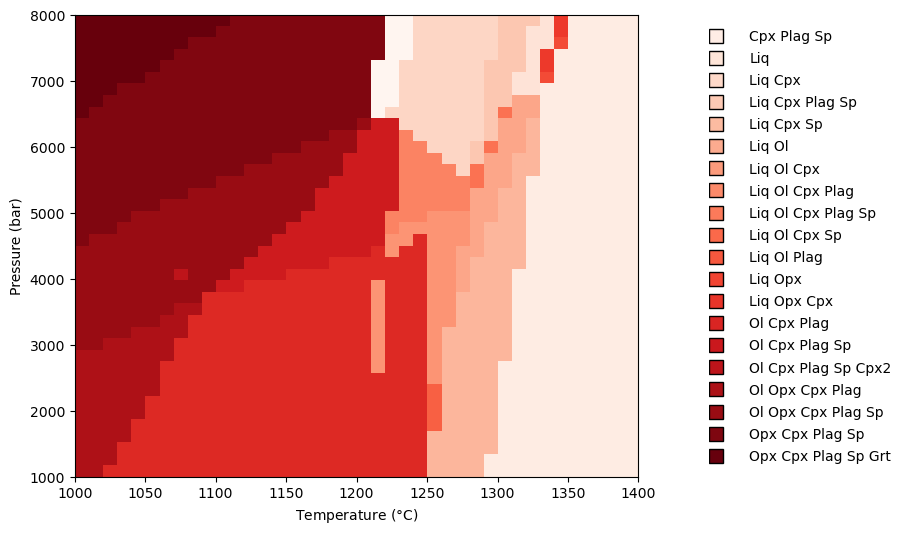

In [27]:
ptt.plot_phaseDiagram(Combined = rMELTS_03b)

# Lyons et al. (2007) FLX513 for comparison

In [28]:
Lyons = {'SiO2': 48.82,
        'TiO2': 0.35,
        'Al2O3': 19.23,
        'Cr2O3': 0.0,
        'FeOt': 3.56,
        'MnO': 0.0,
        'MgO': 9.33,
        'CaO': 16.77,
        'Na2O': 1.79,
        'K2O': 0.06}

In [29]:
Holland_Lyons = ptt.phaseDiagram_calc(Model = "Holland",
                                bulk = Lyons,
                                cores = 1,
                                T_max_C=1400,
                                T_min_C=950,
                                T_num=100,
                                P_min_bar=1000,
                                P_max_bar=12000,
                                P_num=100,
                                Fe3Fet_Liq=0.12,
                                i_max = 300)

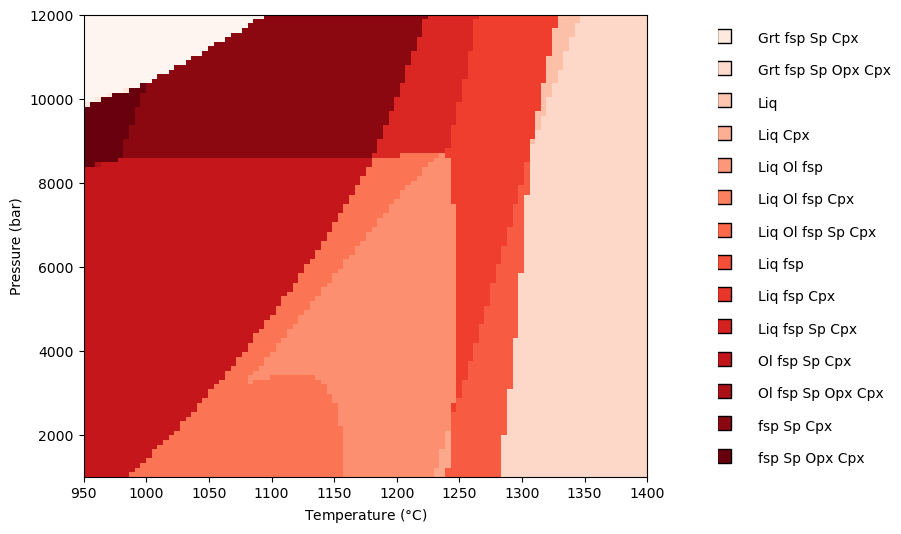

In [30]:
ptt.plot_phaseDiagram(Combined = Holland_Lyons)

In [31]:
pMELTS_Lyons = ptt.phaseDiagram_calc(Model = "pMELTS",
                                bulk = Lyons,
                                cores = 1,
                                T_max_C=1400,
                                T_min_C=950,
                                T_num=48,
                                P_min_bar=1000,
                                P_max_bar=12000,
                                P_num=48,
                                Fe3Fet_Liq = 0.12,
                                i_max = 100)

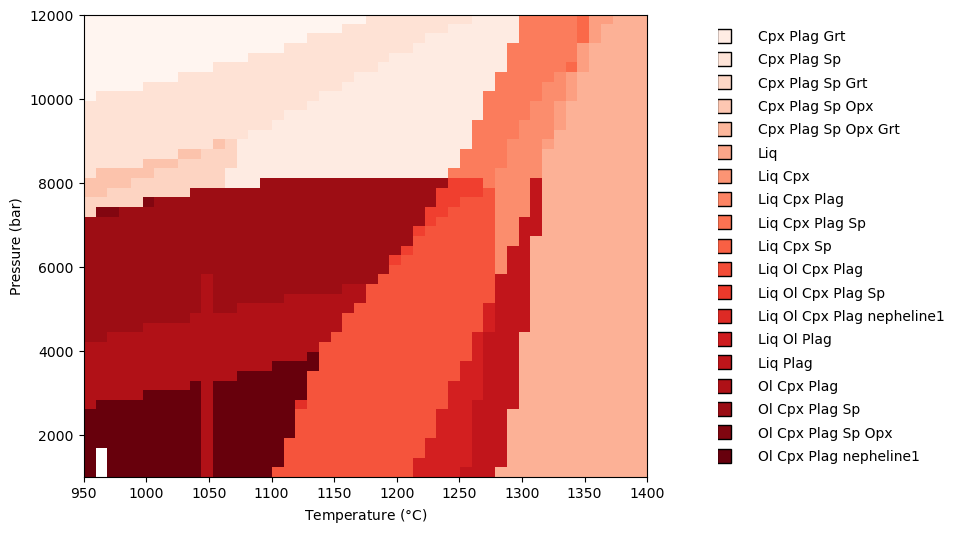

In [32]:
ptt.plot_phaseDiagram(Combined = pMELTS_Lyons)

In [33]:
for i in range(1):
    pMELTS_Lyons = ptt.phaseDiagram_refine(Data = pMELTS_Lyons, Model = "pMELTS", bulk = Lyons, i_max = 300, Fe3Fet_Liq = 0.12)

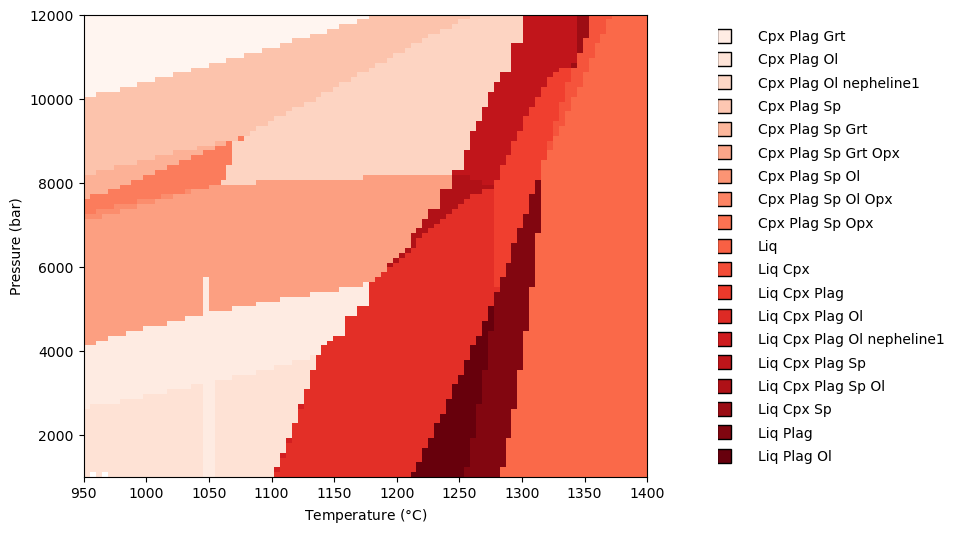

In [34]:
ptt.plot_phaseDiagram(Combined = pMELTS_Lyons)

In [35]:
rMELTS_Lyons = ptt.phaseDiagram_calc(Model = "MELTSv1.0.2",
                                bulk = Lyons,
                                cores = 1,
                                T_max_C=1400,
                                T_min_C=1000,
                                T_num=40,
                                P_min_bar=1000,
                                P_max_bar=8000,
                                P_num=40,
                                Fe3Fet_Liq = 0.12,
                                i_max = 100)

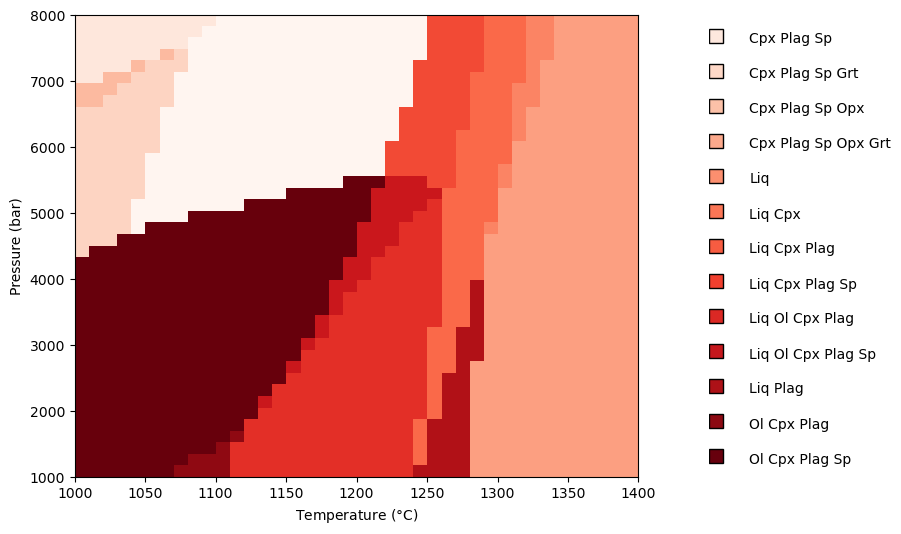

In [36]:
ptt.plot_phaseDiagram(Combined = rMELTS_Lyons)